Juliana Xu

**Deliverable 3**

**1. Final Training Results**

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC 
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [152]:
# Import Dataset
mushrooms = pd.read_csv("/Users/julianaxu/Downloads/mushrooms.csv")

# Delete the colums with label "veil-type". Mushrooms now has shape (8124, 22).
mushrooms = mushrooms.drop("veil-type", axis = 1)

All mushrooms within this dataset have the same veil type so 100% of the values in this column are identical. Therefore, it does not contribute to the determination of the edibility of a mushroom and can be removed to render a more efficient model. 

In [153]:
# Create X and y. 
# y is an array of the first column. 
# X is an array of all the subsequent columns. 
X = np.array(mushrooms.iloc[:, 1:])
y = np.array(mushrooms.iloc[:, 0])

# Create training and test sets. Note: train/valid/test = .65/.15/.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
print("Factor data (y_test): ", y_test)

# Create a validation set. Note: 12% of 80%  = 15% of full dataset
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.12)

# Use Label Encoder to turn categorical data into numerical.
le = preprocessing.LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)

# Do the same for y_test. Note: 0 = edible, 1 = poisonous
le.fit(y_test)
y_test = le.transform(y_test)

# Do the same for y_valid.
le.fit(y_valid)
y_valid = le.transform(y_valid)

# Use Label Encoder on X_train, X_valid and _test
for i in range(21):
    # X_train
    le.fit(X_train[:, i])
    X_train[:, i] = le.transform(X_train[:, i])
    # X_valid
    le.fit(X_valid[:, i])
    X_valid[:, i] = le.transform(X_valid[:, i])
    # X_test
    le.fit(X_test[:, i])
    X_test[:, i] = le.transform(X_test[:, i])
    
print("Numerical data (y_test): ", y_test)

Factor data (y_test):  ['p' 'p' 'e' ... 'e' 'e' 'p']
Numerical data (y_test):  [1 1 0 ... 0 0 1]


The data within this dataset was categorical. It needed to be converted to numerical data in order to facilitate the implementation of different classifiers. 

**SVM**

In [154]:
# Using SVM

# Find out whether to use l1 or l2 regularization
svm1 = LinearSVC(class_weight = 'balanced', penalty = 'l1', dual = False, max_iter = 40000)
svm.fit(X_train, y_train)
print("Validation Accuracy with l1 regularization: ", svm.score(X_valid, y_valid))

svm2 = LinearSVC(class_weight = 'balanced', penalty = 'l2', dual = False, max_iter = 40000)
svm2.fit(X_train, y_train)
print("Validation Accuracy with l2 regularization: ", svm2.score(X_valid, y_valid), "\n")

# Find out to which value C should be set
svm3 = LinearSVC(C = 1, class_weight = 'balanced', penalty = 'l1', dual = False, max_iter = 40000)
svm3.fit(X_train, y_train)
print("Validation Accuracy with C = 1: ", svm3.score(X_valid, y_valid))

svm4 = LinearSVC(C = 10, class_weight = 'balanced', penalty = 'l1', dual = False, max_iter = 40000)
svm4.fit(X_train, y_train) 
print("Validation Accuracy with C = 5: ", svm4.score(X_valid, y_valid))

svm5 = LinearSVC(C = 100, class_weight = 'balanced', penalty = 'l1', dual = False, max_iter = 40000)
svm5.fit(X_train, y_train)
print("Validation Accuracy with C = 10: ", svm5.score(X_valid, y_valid))

Validation Accuracy with l1 regularization:  0.95
Validation Accuracy with l2 regularization:  0.9474358974358974 

Validation Accuracy with C = 1:  0.9512820512820512
Validation Accuracy with C = 5:  0.9525641025641025
Validation Accuracy with C = 10:  0.9525641025641025


Through playing around with different hyperparameters, we see that the highest accuracy on the validation set is obtained when the penalty is set to l1 regularization. We also notice that the accuracy does not noticeably change with various values of C so using the default, C = 1, should work fine. Max_iter is set to 40000 because a lower value will result in ConvergenceWarning error message of "Liblinear failed to converge, increase the number of iterations".

In summary, we will be using the following hyperparameters:
- C = 1
- penalty = l1
- max_iter = 40000

In [155]:
# Create svm classifer with hyperparameters determined from above
svm = LinearSVC(class_weight = 'balanced', penalty = 'l1', dual = False, max_iter = 40000)
svm.fit(X_train, y_train)
svm.score(X_train, y_train)
svm.score(X_valid, y_valid)
svm.score(X_test, y_test)

# Print accuracies 
print("Training Accuracy: ", svm.score(X_train, y_train))
print("Validation Accuracy: ", svm.score(X_valid, y_valid))
print("Test Accuracy: ", svm.score(X_test, y_test), "\n")


# Print weights assigned to each feature
print("Weights assigned to each feature:\n", svm.coef_)


Training Accuracy:  0.9506906801888442
Validation Accuracy:  0.9512820512820512
Test Accuracy:  0.9532307692307692 

Weights assigned to each feature:
 [[ 9.53274677e-04  6.14914250e-02 -2.95964003e-02  3.83380747e-01
  -3.19022795e-01 -7.57934676e+00 -5.11342644e+00  4.81849688e+00
  -5.55601226e-02  7.60419044e-02 -1.62910041e+00 -3.28983503e+00
   2.31514697e-01 -3.51396777e-02 -2.12732383e-02  1.02755327e+01
   7.68773399e-01  9.31039834e-01 -3.95293970e-02 -2.75064517e-01
   3.70105196e-02]]


**RFC**

In [156]:
# Using RandomForests
rfc = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth = None, max_features = 'auto')
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
rfc.score(X_valid, y_valid)
rfc.score(X_test, y_test)

print("Training Accuracy: ", rfc.score(X_train, y_train))
print("Validation Accuracy: ", rfc.score(X_valid, y_valid))
print("Test Accuracy: ", rfc.score(X_test, y_test))

Training Accuracy:  1.0
Validation Accuracy:  1.0
Test Accuracy:  1.0


Using a Random Forest Classifier with all hyperparameters set to their default values returns training, validation and test accuracies as 1.0. There is no need to tune the hyperparameters because no better result can be obtained. 

Moreover, we will be choosing to implement the RFC model. 

In [157]:
# Confusion Matrix for RandomForestClassifier
predictions = rfc.predict(X_test)
conf_mat = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_mat)

Confusion Matrix:
 [[863   0]
 [  0 762]]


The confusion matrix displayed above makes sense as the RCF model has 100% accuracy. 

**Feature Importances**

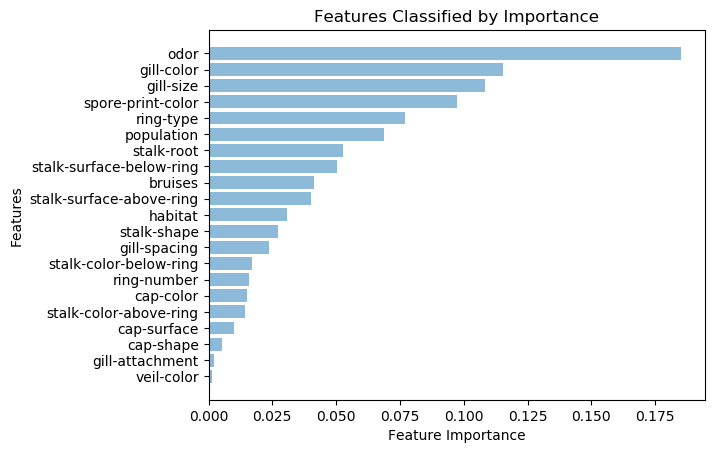

In [158]:
# feature_importances_ is an attribute of RandomForestClassifier
feature_importance = rfc.feature_importances_

# Extracting headers from dataframe and saved into list
header = []

for col in mushrooms:
    header.append(col)
header.remove("class")   

# List of tuples [(feature_importance, header)]
data = []
for i in range(len(header)):
    data.append((feature_importance[i], header[i]))
data.sort()

# Saving ordered tuples into two separate lists
feature_importance_sorted = []
header_sorted = []
for x in data:
    feature_importance_sorted.append(x[0])
    header_sorted.append(x[1])
    
# Plot Importance of Features
y_pos = np.arange(len(feature_importance))

plt.barh(y_pos, feature_importance_sorted, align='center', alpha=0.5)
plt.yticks(y_pos, header_sorted)

plt.ylabel('Features')
plt.xlabel('Feature Importance')
plt.title('Features Classified by Importance')

plt.show()

This graph shows the importance of each feature in determining whether or not a mushroom is poisonous. 

**Most important features:** odor, gill-color, gill-size

**Least important features:** veil-color, gill-attachment, cap-shape

**2. Final Demonstration Proposal**

The final model will be presented in the form of a basic landing page type website.
I do not have any experience in any types of web or software development. 
I plan on using online tutorials as well as contacting project leaders in order to realize the final application. 

The idea behind the website is that the user will be able to input the features of a given mushroom through a series of menus. The model will then use those inputs to classify the mushroom as edible(0) or poisonous(1).  